#**Step3: Huấn luyện mô hình**











##Import packages

In [351]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler as SS
import joblib as jl
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm,lognorm,expon

##Import dataset

In [352]:
#Import dataset   
source = 'Airport'
folder = 'More_than_0'
name = '_more_than_0'  
set='1'
url = f'/content/drive/MyDrive/DS105_Project/Dataset/Train/{source}/{folder}/{set}{name}.csv'
#url = f'/content/drive/MyDrive/DS105_Project/Dataset/Preparing/{folder}/{set}{name}.csv'
data = pd.read_csv(url)
print(data.shape[0])


10023


In [353]:
Scale = SS()
if folder == 'Full':
  data[['tip_amount']] = Scale.fit_transform(data[['tip_amount']])
else:
  data[['tip_amount']] = Scale.fit_transform(np.log(data[['tip_amount']]+1))
data[['total_amount']] = Scale.fit_transform(np.log(data[['total_amount']]+1))
if folder != 'Full':
  data[['fare_amount']] = Scale.fit_transform(np.log(data[['fare_amount']]+1))
  data[['trip_distance']] = Scale.fit_transform(np.log(data[['trip_distance']]+1))

In [354]:
def encode(frame, feature):
    ordering = pd.DataFrame()
    ordering['val'] = frame[feature].unique()
    ordering.index = ordering.val
    ordering['spmean'] = frame[[feature, 'tip_amount']].groupby(feature).mean()['tip_amount']
    ordering = ordering.sort_values('spmean')
    ordering['ordering'] = range(1, ordering.shape[0]+1)
    ordering = ordering['ordering'].to_dict()
    
    for cat, o in ordering.items():
        frame.loc[frame[feature] == cat, feature] = o
encode(data,'DOLocationID') #'payment_type',,'congestion_surcharge'
if folder == 'Full':
  encode(data,'payment_type')
  encode(data,'congestion_surcharge')


In [355]:
data

,DOLocationID,total_amount,fare_amount,trip_distance,tip_amount
0,4,-0.928857,-0.912291,-0.693842,-0.677828
1,4,-1.262702,-1.282740,-1.195726,-0.932796
2,4,0.558099,0.758520,0.950581,0.201359
3,4,1.117265,1.305310,-3.301799,1.080693
4,10,1.300632,1.491959,-3.301799,1.250028
...,...,...,...,...,...
10018,4,0.385701,0.514544,0.775226,0.605304
10019,4,0.942913,1.349976,0.609327,-0.682587
10020,4,1.209473,1.636746,1.297203,-0.682587
10021,10,1.451468,1.712408,1.624558,-0.682587


### Tạo danh sách phụ để lưu tất cả các biến chung.

In [356]:
def sub_lists (l): 
    base = []   
    lists = [base] 
    for i in range(len(l)): 
        orig = lists[:] 
        new = l[i] 
        for j in range(len(lists)): 
            lists[j] = lists[j] + [new] 
        lists = orig + lists 
          
    return lists

In [357]:
sl = sub_lists(data.iloc[:,0:-1].columns) 

sl = [i for i in sl if i != []]

print(len(sl)," collective features")

15  collective features


##Simple Linear Regression và Multiple Linear Regression



#Getdummies biến rời rạc

##Splitdata train và test

In [358]:
y_data = data.tip_amount.to_frame()

In [359]:
x_data = data.iloc[:,0:-1]
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=0)

####Visualize Regression Plot và Residual Plot
- **Regression plot:** Biểu đồ này sẽ hiển thị sự kết hợp của một điểm dữ liệu phân tán (một biểu đồ phân tán), cũng như đường hồi quy tuyến tính được điều chỉnh đi qua dữ liệu.
- **Residual plot:** Đây là đồ thị biểu diễn phần dư trên trục y tung và biến độc lập trên trục x hoành.

In [360]:
#list_col =data.iloc[:,0:-1].columns #,'RatecodeID','quarter','PU_Borough'
#for col in list_col:
#  plt.figure(figsize= (20,8))
#  ax1 = plt.subplot(1,2,1)
#  plt.title(f"Regression plot of {col} vs tip_amount")
#  sns.regplot(x = col, y = 'tip_amount', data = data, ax = ax1)
#
#  ax2 = plt.subplot(1,2,2)
#  plt.title(f"Residual plot of {col} vs tip_amount")
#  sns.residplot(data[f'{col}'], data['tip_amount'], color= 'Red', ax = ax2)

###Simple Linear Regression và Multiple Linear Regression

In [361]:
model = []
list_feature_details = []
list_rmse = []
list_r2_train = []
list_r2_test = []
fold_4 = []
fold_5 = []
std_4 = []
std_5 = []
note = []
Model = []
for i in sl:
  # Thêm các feature vào list
  list_feature_details.append(i)  

  lm = LinearRegression()
  lm.fit(x_train[i],y_train)

  y_train_pred = lm.predict(x_train[i])
  y_test_pred = lm.predict(x_test[i])

  r2_train = r2_score(y_train, y_train_pred)
  list_r2_train.append(r2_train)

  r2_test = r2_score(y_test, y_test_pred)
  list_r2_test.append(r2_test)

  rmse = sqrt(mean_squared_error(y_test, y_test_pred))
  list_rmse.append(rmse)

  lr_4 = LinearRegression()
  scores_4 = cross_val_score(lr_4, x_data[i], y_data, cv=4)
  fold_4.append(np.mean(scores_4))
  std_4.append(np.std(scores_4))

  lr_5 = LinearRegression()
  scores_5 = cross_val_score(lr_5, x_data[i], y_data, cv=5)
  fold_5.append(np.mean(scores_5))
  std_5.append(np.std(scores_5))

  if len(i) == 1:
    model.append("Simple Linear Regression")
    Model.append(lm)
  else:
    model.append("Multiple Linear Regression") 
    Model.append(lm)

  note.append('test_size = 0.2, ' + f'num feature = {len(i)}') 


###Danh sách kết quả của Simple, Multiple Linear Regression

In [362]:
pd.DataFrame(model).value_counts()

Multiple Linear Regression    11
Simple Linear Regression       4
dtype: int64

In [363]:
dataframe = []
dataframe = pd.DataFrame({'Model':model,
                          'Feature details': list_feature_details,
                          'RMSE': list_rmse,
                          'R^2 train': list_r2_train,
                          'R^2 test':list_r2_test,
                          '4 fold - mean': fold_4,
                          '4 fold - std': std_4,
                          '5 fold - mean': fold_5,
                          '5 fold - std': std_5,
                          'note': note,
                          'Deploy': Model})
#dataframe['note'] = 'test_size = 0.2, ' + f'num feature = {len(lis'

In [364]:
dataframe = dataframe.sort_values(by= 'R^2 test', ascending= False)
dataframe.index = range(len(dataframe))
result_LN = dataframe[(dataframe['4 fold - mean'] > 0.6) | (dataframe['5 fold - mean']>0.6)].sort_values(by = 'R^2 test', ascending= True)

In [365]:
dataframe

,Model,Feature details,RMSE,R^2 train,R^2 test,4 fold - mean,4 fold - std,5 fold - mean,5 fold - std,note,Deploy
0,Multiple Linear Regression,"[DOLocationID, total_amount, fare_amount, trip...",0.448938,0.801804,0.803489,0.801461,0.009350,0.801935,0.016687,"test_size = 0.2, num feature = 4","LinearRegression(copy_X=True, fit_intercept=Tr..."
1,Multiple Linear Regression,"[total_amount, fare_amount, trip_distance]",0.449187,0.801521,0.803270,0.801338,0.009003,0.801856,0.016036,"test_size = 0.2, num feature = 3","LinearRegression(copy_X=True, fit_intercept=Tr..."
2,Multiple Linear Regression,"[DOLocationID, total_amount, fare_amount]",0.449228,0.801166,0.803235,0.800916,0.009222,0.801407,0.016752,"test_size = 0.2, num feature = 3","LinearRegression(copy_X=True, fit_intercept=Tr..."
3,Multiple Linear Regression,"[total_amount, fare_amount]",0.449432,0.800868,0.803056,0.800789,0.008868,0.801321,0.016106,"test_size = 0.2, num feature = 2","LinearRegression(copy_X=True, fit_intercept=Tr..."
4,Multiple Linear Regression,"[DOLocationID, total_amount, trip_distance]",0.509637,0.753270,0.746758,0.751599,0.011043,0.752390,0.019795,"test_size = 0.2, num feature = 3","LinearRegression(copy_X=True, fit_intercept=Tr..."
5,Multiple Linear Regression,"[total_amount, trip_distance]",0.514133,0.750928,0.742269,0.748750,0.010440,0.749560,0.019723,"test_size = 0.2, num feature = 2","LinearRegression(copy_X=True, fit_intercept=Tr..."
6,Multiple Linear Regression,"[DOLocationID, total_amount]",0.516909,0.745009,0.739478,0.743823,0.013313,0.744467,0.021052,"test_size = 0.2, num feature = 2","LinearRegression(copy_X=True, fit_intercept=Tr..."
7,Simple Linear Regression,[total_amount],0.523003,0.742005,0.733300,0.740096,0.012941,0.740761,0.020783,"test_size = 0.2, num feature = 1","LinearRegression(copy_X=True, fit_intercept=Tr..."
8,Multiple Linear Regression,"[DOLocationID, fare_amount, trip_distance]",0.621893,0.628699,0.622908,0.626724,0.025473,0.627799,0.039327,"test_size = 0.2, num feature = 3","LinearRegression(copy_X=True, fit_intercept=Tr..."
9,Multiple Linear Regression,"[DOLocationID, fare_amount]",0.622382,0.627511,0.622316,0.625720,0.025802,0.626829,0.040029,"test_size = 0.2, num feature = 2","LinearRegression(copy_X=True, fit_intercept=Tr..."


In [366]:
if result_LN.empty == False:
  result_LN.index = range(len(result_LN))
result_LN

,Model,Feature details,RMSE,R^2 train,R^2 test,4 fold - mean,4 fold - std,5 fold - mean,5 fold - std,note,Deploy
0,Simple Linear Regression,[fare_amount],0.625224,0.626588,0.618858,0.624483,0.024047,0.625614,0.037817,"test_size = 0.2, num feature = 1","LinearRegression(copy_X=True, fit_intercept=Tr..."
1,Multiple Linear Regression,"[fare_amount, trip_distance]",0.624691,0.627846,0.619508,0.625540,0.023754,0.626652,0.037131,"test_size = 0.2, num feature = 2","LinearRegression(copy_X=True, fit_intercept=Tr..."
2,Multiple Linear Regression,"[DOLocationID, fare_amount]",0.622382,0.627511,0.622316,0.625720,0.025802,0.626829,0.040029,"test_size = 0.2, num feature = 2","LinearRegression(copy_X=True, fit_intercept=Tr..."
3,Multiple Linear Regression,"[DOLocationID, fare_amount, trip_distance]",0.621893,0.628699,0.622908,0.626724,0.025473,0.627799,0.039327,"test_size = 0.2, num feature = 3","LinearRegression(copy_X=True, fit_intercept=Tr..."
4,Simple Linear Regression,[total_amount],0.523003,0.742005,0.733300,0.740096,0.012941,0.740761,0.020783,"test_size = 0.2, num feature = 1","LinearRegression(copy_X=True, fit_intercept=Tr..."
5,Multiple Linear Regression,"[DOLocationID, total_amount]",0.516909,0.745009,0.739478,0.743823,0.013313,0.744467,0.021052,"test_size = 0.2, num feature = 2","LinearRegression(copy_X=True, fit_intercept=Tr..."
6,Multiple Linear Regression,"[total_amount, trip_distance]",0.514133,0.750928,0.742269,0.748750,0.010440,0.749560,0.019723,"test_size = 0.2, num feature = 2","LinearRegression(copy_X=True, fit_intercept=Tr..."
7,Multiple Linear Regression,"[DOLocationID, total_amount, trip_distance]",0.509637,0.753270,0.746758,0.751599,0.011043,0.752390,0.019795,"test_size = 0.2, num feature = 3","LinearRegression(copy_X=True, fit_intercept=Tr..."
8,Multiple Linear Regression,"[total_amount, fare_amount]",0.449432,0.800868,0.803056,0.800789,0.008868,0.801321,0.016106,"test_size = 0.2, num feature = 2","LinearRegression(copy_X=True, fit_intercept=Tr..."
9,Multiple Linear Regression,"[DOLocationID, total_amount, fare_amount]",0.449228,0.801166,0.803235,0.800916,0.009222,0.801407,0.016752,"test_size = 0.2, num feature = 3","LinearRegression(copy_X=True, fit_intercept=Tr..."


##Polynomial Linear Regression

In [367]:
model = []
list_feature_details = []
list_rmse = []
list_r2_train = []
list_r2_test = []
fold_4 = []
fold_5 = []
std_4 = []
std_5 = []
list_degree = []
note = []
Model = []
for i in sl:
  for j in range(2,5):
    # Thêm các feature vào list
    list_feature_details.append(i)  

    pr = PolynomialFeatures(degree= j, include_bias= False)
    X_train_poly = pr.fit_transform(x_train[i])
    X_test_poly = pr.fit_transform(x_test[i])
    lm = LinearRegression()
    lm.fit(X_train_poly,y_train)

    y_train_pred = lm.predict(X_train_poly)
    y_test_pred = lm.predict(X_test_poly)

    r2_train = r2_score(y_train, y_train_pred)
    list_r2_train.append(r2_train)

    r2_test = r2_score(y_test, y_test_pred)
    list_r2_test.append(r2_test)

    rmse = sqrt(mean_squared_error(y_test, y_test_pred))
    list_rmse.append(rmse)

    x_data_poly = pr.fit_transform(x_data[i])
    lr_4 = LinearRegression()
    scores_4 = cross_val_score(lr_4, x_data_poly, y_data, cv=4)
    fold_4.append(np.mean(scores_4))
    std_4.append(np.std(scores_4))

    lr_5 = LinearRegression()
    scores_5 = cross_val_score(lr_5, x_data_poly, y_data, cv=5)
    fold_5.append(np.mean(scores_5))
    std_5.append(np.std(scores_5))
    
    list_degree.append('test_size = 0.2, ' + f'Degree = {j}, ' + f'num feature = {len(i)}')
    model.append("Polynomial Linear Regression") 
    Model.append(lm)

###Danh sách kết quả của Polynomial Linear Regression 

In [368]:
dataframe_poly = []
dataframe_poly = pd.DataFrame({'Model':model,
                          'Feature details': list_feature_details,
                          'RMSE': list_rmse,
                          'R^2 train': list_r2_train,
                          'R^2 test':list_r2_test,
                          '4 fold - mean': fold_4,
                          '4 fold - std': std_4,
                          '5 fold - mean': fold_5,
                          '5 fold - std': std_5,
                          'note': list_degree,
                          'Deploy': Model})
#dataframe_poly['note'] = 'test_size = 0.2, ' + dataframe_poly['note']

In [369]:
dataframe_poly = dataframe_poly.sort_values(by= 'R^2 test', ascending= False)
dataframe_poly.index = range(len(dataframe_poly))
result_poly = dataframe_poly[((dataframe_poly['4 fold - mean'] >= 0.6) | (dataframe_poly['5 fold - mean']>= 0.6))].sort_values(by = 'R^2 test', ascending= False)

In [370]:
dataframe_poly

,Model,Feature details,RMSE,R^2 train,R^2 test,4 fold - mean,4 fold - std,5 fold - mean,5 fold - std,note,Deploy
0,Polynomial Linear Regression,"[DOLocationID, total_amount, fare_amount]",0.386370,0.849976,0.854447,0.792650,0.056108,0.796710,0.071749,"test_size = 0.2, Degree = 3, num feature = 3","LinearRegression(copy_X=True, fit_intercept=Tr..."
1,Polynomial Linear Regression,"[DOLocationID, total_amount, fare_amount, trip...",0.413934,0.858641,0.832938,0.698572,0.155891,0.711132,0.185622,"test_size = 0.2, Degree = 3, num feature = 4","LinearRegression(copy_X=True, fit_intercept=Tr..."
2,Polynomial Linear Regression,"[total_amount, fare_amount]",0.417918,0.852290,0.829707,0.642232,0.204944,0.653008,0.247598,"test_size = 0.2, Degree = 4, num feature = 2","LinearRegression(copy_X=True, fit_intercept=Tr..."
3,Polynomial Linear Regression,"[total_amount, fare_amount]",0.422323,0.824684,0.826098,0.812368,0.026698,0.813749,0.034948,"test_size = 0.2, Degree = 3, num feature = 2","LinearRegression(copy_X=True, fit_intercept=Tr..."
4,Polynomial Linear Regression,"[DOLocationID, total_amount, fare_amount, trip...",0.422843,0.827477,0.825669,0.811893,0.010705,0.811275,0.026097,"test_size = 0.2, Degree = 2, num feature = 4","LinearRegression(copy_X=True, fit_intercept=Tr..."
5,Polynomial Linear Regression,"[DOLocationID, total_amount, fare_amount]",0.423003,0.825420,0.825537,0.818378,0.011453,0.818659,0.021901,"test_size = 0.2, Degree = 2, num feature = 3","LinearRegression(copy_X=True, fit_intercept=Tr..."
6,Polynomial Linear Regression,"[total_amount, fare_amount, trip_distance]",0.439718,0.813757,0.811477,0.804387,0.005936,0.804396,0.020541,"test_size = 0.2, Degree = 2, num feature = 3","LinearRegression(copy_X=True, fit_intercept=Tr..."
7,Polynomial Linear Regression,"[total_amount, fare_amount]",0.440961,0.811274,0.810410,0.807766,0.011492,0.808247,0.019295,"test_size = 0.2, Degree = 2, num feature = 2","LinearRegression(copy_X=True, fit_intercept=Tr..."
8,Polynomial Linear Regression,"[DOLocationID, total_amount, trip_distance]",0.485956,0.774421,0.769744,0.757962,0.031639,0.760801,0.038900,"test_size = 0.2, Degree = 3, num feature = 3","LinearRegression(copy_X=True, fit_intercept=Tr..."
9,Polynomial Linear Regression,"[DOLocationID, total_amount, trip_distance]",0.488240,0.771641,0.767575,0.768802,0.012479,0.770017,0.020166,"test_size = 0.2, Degree = 2, num feature = 3","LinearRegression(copy_X=True, fit_intercept=Tr..."


In [371]:
if result_poly.empty == False:
  result_poly.index = range(len(result_poly))
result_poly

,Model,Feature details,RMSE,R^2 train,R^2 test,4 fold - mean,4 fold - std,5 fold - mean,5 fold - std,note,Deploy
0,Polynomial Linear Regression,"[DOLocationID, total_amount, fare_amount]",0.386370,0.849976,0.854447,0.792650,0.056108,0.796710,0.071749,"test_size = 0.2, Degree = 3, num feature = 3","LinearRegression(copy_X=True, fit_intercept=Tr..."
1,Polynomial Linear Regression,"[DOLocationID, total_amount, fare_amount, trip...",0.413934,0.858641,0.832938,0.698572,0.155891,0.711132,0.185622,"test_size = 0.2, Degree = 3, num feature = 4","LinearRegression(copy_X=True, fit_intercept=Tr..."
2,Polynomial Linear Regression,"[total_amount, fare_amount]",0.417918,0.852290,0.829707,0.642232,0.204944,0.653008,0.247598,"test_size = 0.2, Degree = 4, num feature = 2","LinearRegression(copy_X=True, fit_intercept=Tr..."
3,Polynomial Linear Regression,"[total_amount, fare_amount]",0.422323,0.824684,0.826098,0.812368,0.026698,0.813749,0.034948,"test_size = 0.2, Degree = 3, num feature = 2","LinearRegression(copy_X=True, fit_intercept=Tr..."
4,Polynomial Linear Regression,"[DOLocationID, total_amount, fare_amount, trip...",0.422843,0.827477,0.825669,0.811893,0.010705,0.811275,0.026097,"test_size = 0.2, Degree = 2, num feature = 4","LinearRegression(copy_X=True, fit_intercept=Tr..."
5,Polynomial Linear Regression,"[DOLocationID, total_amount, fare_amount]",0.423003,0.825420,0.825537,0.818378,0.011453,0.818659,0.021901,"test_size = 0.2, Degree = 2, num feature = 3","LinearRegression(copy_X=True, fit_intercept=Tr..."
6,Polynomial Linear Regression,"[total_amount, fare_amount, trip_distance]",0.439718,0.813757,0.811477,0.804387,0.005936,0.804396,0.020541,"test_size = 0.2, Degree = 2, num feature = 3","LinearRegression(copy_X=True, fit_intercept=Tr..."
7,Polynomial Linear Regression,"[total_amount, fare_amount]",0.440961,0.811274,0.810410,0.807766,0.011492,0.808247,0.019295,"test_size = 0.2, Degree = 2, num feature = 2","LinearRegression(copy_X=True, fit_intercept=Tr..."
8,Polynomial Linear Regression,"[DOLocationID, total_amount, trip_distance]",0.485956,0.774421,0.769744,0.757962,0.031639,0.760801,0.038900,"test_size = 0.2, Degree = 3, num feature = 3","LinearRegression(copy_X=True, fit_intercept=Tr..."
9,Polynomial Linear Regression,"[DOLocationID, total_amount, trip_distance]",0.488240,0.771641,0.767575,0.768802,0.012479,0.770017,0.020166,"test_size = 0.2, Degree = 2, num feature = 3","LinearRegression(copy_X=True, fit_intercept=Tr..."


In [372]:
def distribu(lst,degree,source,set,name,folder,index):
  X3 = data[lst]
  Y3 = y_data
  plt.figure(figsize= (20,8)) 
  pr = PolynomialFeatures(degree=degree, include_bias=False)
  X_poly_3 = pr.fit_transform(X3)
  lm_3 = LinearRegression()
  lm_3.fit(X_poly_3,Y3)
  Yhat_3 = lm_3.predict(X_poly_3)

  ax1 = sns.distplot(data['tip_amount'], hist=False, color="r", label="Actual Value")
  sns.distplot(Yhat_3, hist=False, color="b", label="Fitted Values", ax=ax1)
  plt.legend()
  plt.title("Distribution Plot")
  plt.savefig(f'/content/drive/MyDrive/DS105_Project/Dataset/Train/{source}/{folder}/Image/{name}{set}{index}.png')
  #plt.savefig(f'/content/drive/MyDrive/DS105_Project/Dataset/Preparing/{folder}/Image/{name}{set}_test_{index}.png')
  plt.show()

In [373]:
#Poly
Degree =[]
Lst = []
if result_poly.empty == False:
  if len(result_poly) <= 5:
    index_poly = len(result_poly)
  else:
    index_poly = 5
  df_poly = result_poly
else:
  index_poly = 5
  df_poly = dataframe_poly
#df_poly.to_csv(f'/content/drive/MyDrive/DS105_Project/Dataset/Preparing/{folder}/Statistic/{name}{set}_tip_Poly.csv')
df_poly.to_csv(f'/content/drive/MyDrive/DS105_Project/Dataset/Train/{source}/{folder}/Statistic/{name}{set}_tip_PoLy.csv')
for i in range(index_poly):
  for j in range(1,10):
    if f'Degree = {j}' in df_poly.note[i]:
      Degree.append(j);
      Lst.append(df_poly['Feature details'][i])
      break
  jl.dump(df_poly.Deploy[i],f'/content/drive/MyDrive/DS105_Project/Dataset/Train/{source}/{folder}/Model/{set}/{name}{set}_Poly{i}.h5')
  #jl.dump(df_poly.Deploy[i],f'/content/drive/MyDrive/DS105_Project/Dataset/Preparing/{folder}/Model/{name}{set}_Poly{i}.h5')

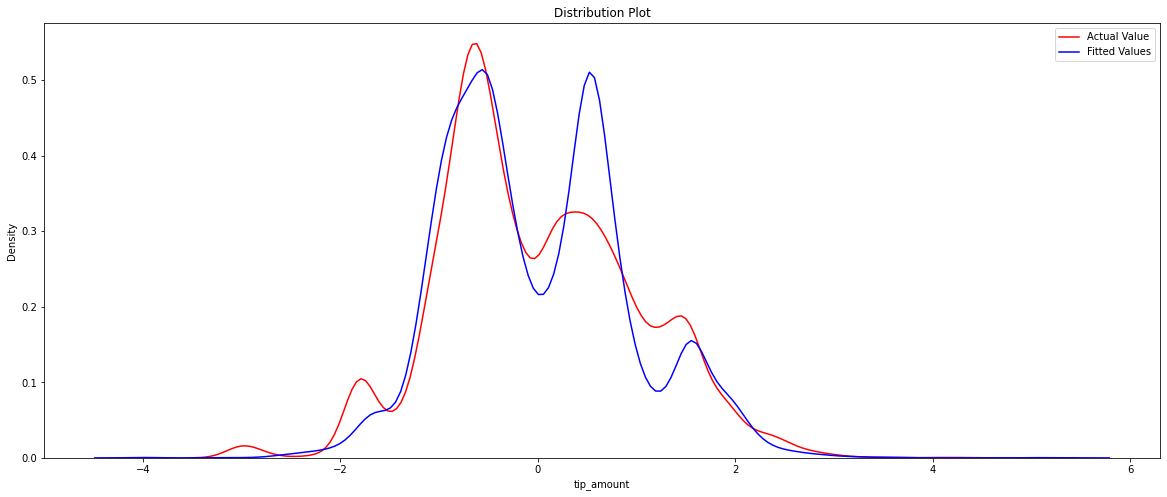

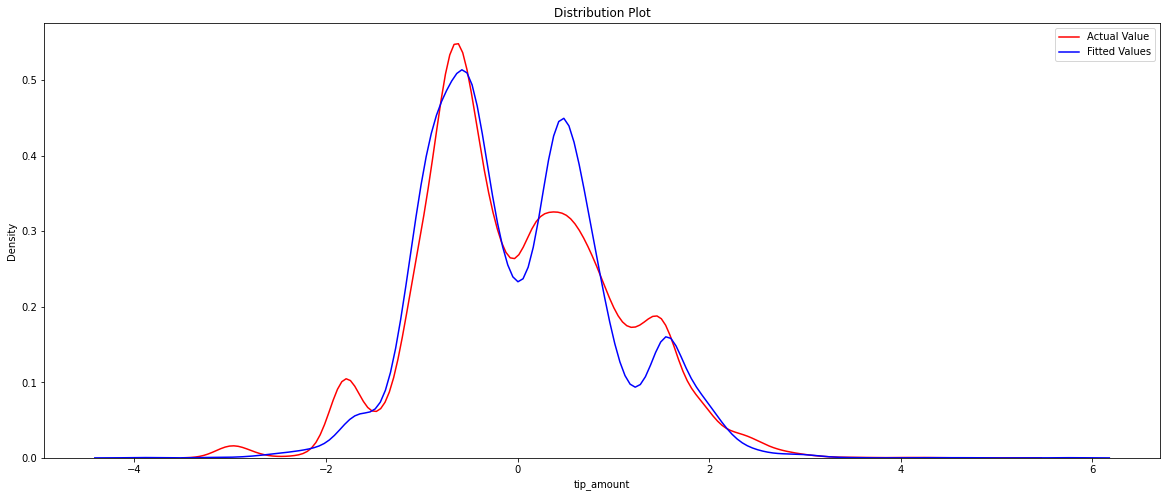

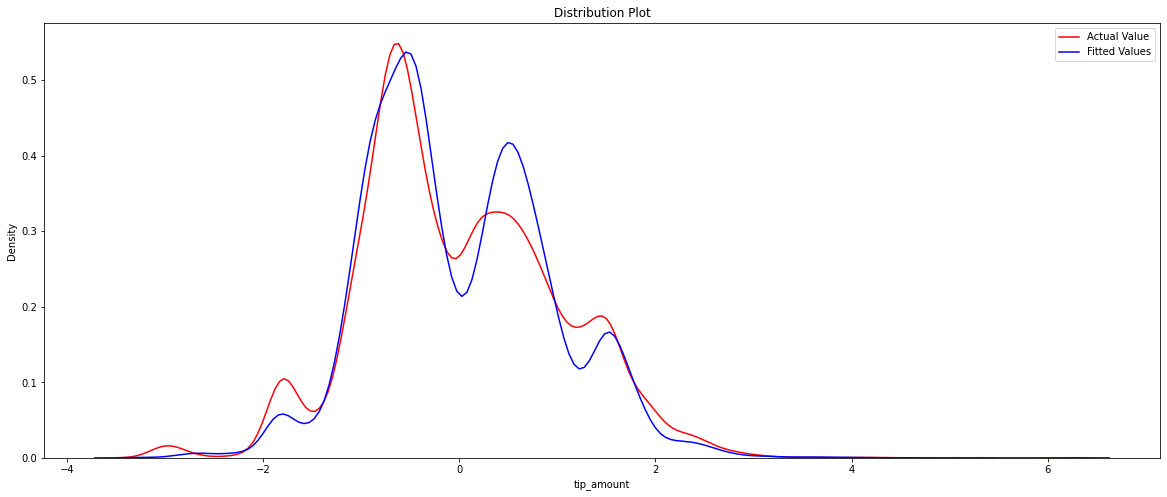

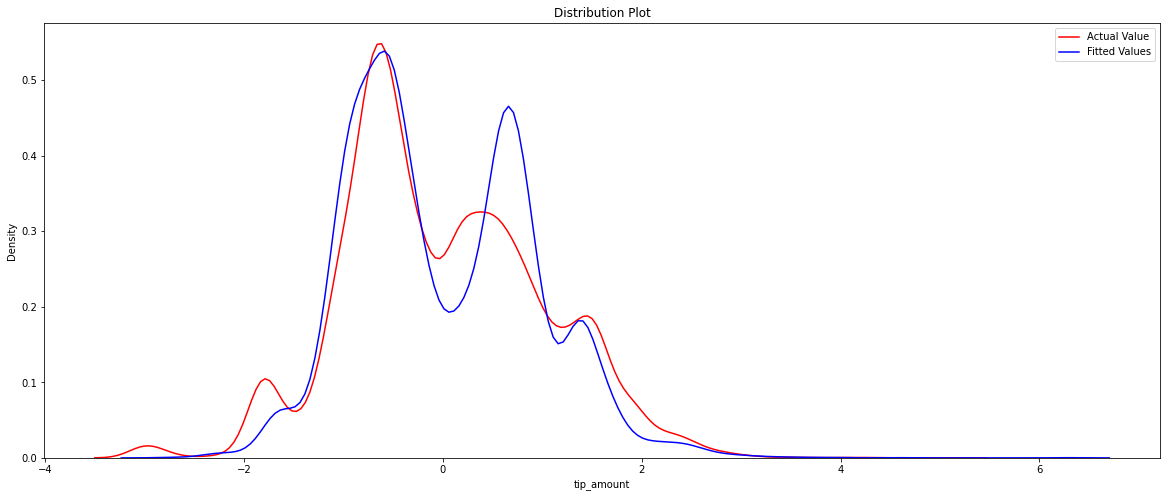

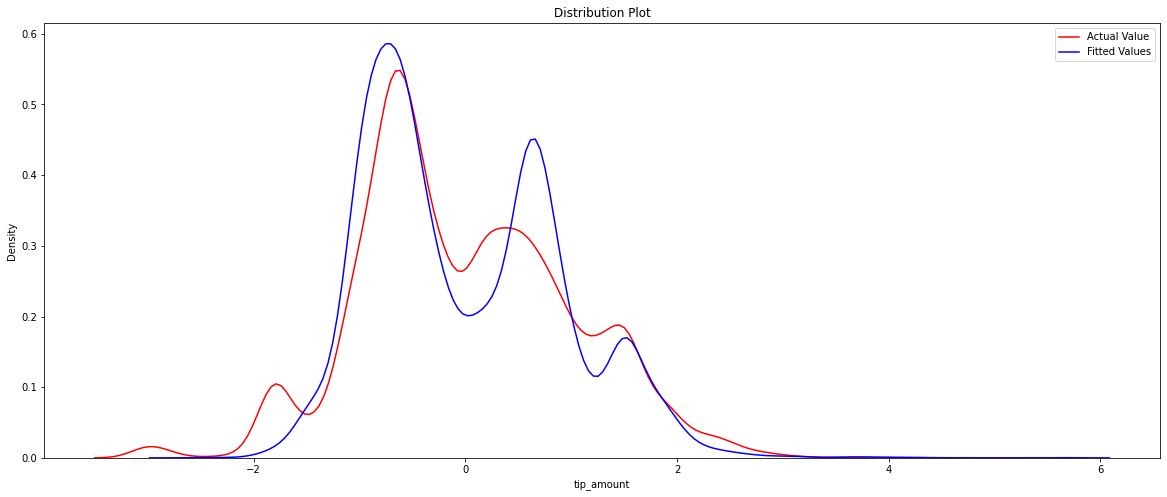

In [374]:
#lst = { 'total_amount', 'fare_amount'} #, 'DOLocationID','payment_type','congestion_surcharge', 'total_amount'
index = 0
for degree,lst in zip(Degree,Lst):
  distribu(lst,degree,source,set,name,folder,index)
  index += 1

In [375]:
if result_LN.empty == False:
  if len(result_LN) <= 5:
    index_LN = len(result_LN)
  else:
    index_LN = 5
  df_LN = result_LN
else:
  index_LN = 1
  df_LN = dataframe
#df_LN.to_csv(f'/content/drive/MyDrive/DS105_Project/Dataset/Preparing/{folder}/Statistic/{name}{set}_tip_LN.csv')
df_LN.to_csv(f'/content/drive/MyDrive/DS105_Project/Dataset/Train/{source}/{folder}/Statistic/{name}{set}_tip_LN.csv')
for i in range(index_LN):
  jl.dump(df_LN.Deploy[i],f'/content/drive/MyDrive/DS105_Project/Dataset/Train/{source}/{folder}/Model/{set}/{name}{set}_LN{i}.h5')
  #jl.dump(df_LN.Deploy[i],f'/content/drive/MyDrive/DS105_Project/Dataset/Preparing/{folder}/Model/{name}{set}_LN{i}.h5')
